## LeNet Implementation

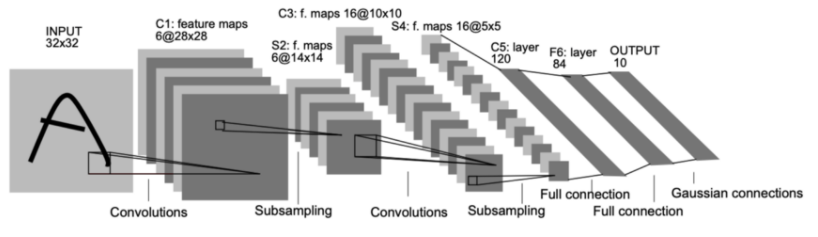

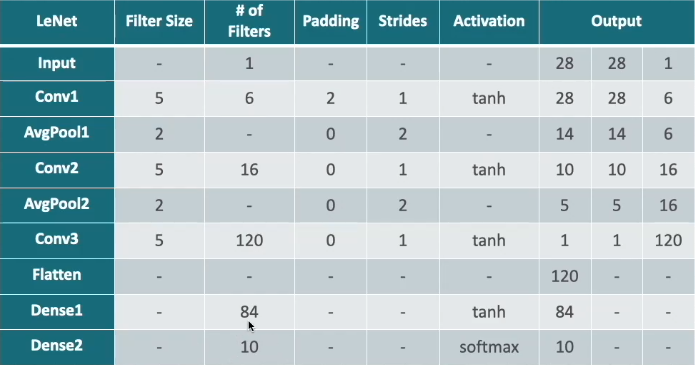

In [1]:
import torch
import torch.nn as nn
import numpy as np 

## LeNet with Model Sub-Classing

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5, padding = 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 120, 5)
        self.flatten = nn.Flatten()
        self.dense1  = nn.Linear(120,84)
        self.dense2  = nn.Linear(84, 10)
        
        self.pool_avg = nn.AvgPool2d(kernel_size = 2, stride=2)
        self.tanh  = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        x = self.pool_avg(x)
        print(x.shape)
        x = self.conv2(x)
        x = self.tanh(x)
        x = self.pool_avg(x)
        x = self.conv3(x)
        x = self.tanh(x)
        x = self.flatten(x)
        print(x.shape)
        x = self.dense1(x)
        x = self.tanh(x)
        x = self.dense2(x)
        x = self.softmax(x)
        print(x.shape)
        return x

In [3]:
batch_size =32

N, n_C, n_H, n_W = 32,1,28,28

x = torch.rand((N, n_C, n_H, n_W))

model = LeNet()
prediction = model(x)


torch.Size([32, 6, 14, 14])
torch.Size([32, 120])
torch.Size([32, 10])


In [4]:
class ConvLayer(nn.Module):
    def __init__(self, input_channel, output_channel, padding, pool=True):
        super(ConvLayer,self).__init__()
        self.pool = pool
        
        self.conv  = nn.Conv2d(input_channel, output_channel, 5, padding=padding)
        self.tanh  = nn.Tanh()
        if self.pool==True:
            self.pool_avg = nn.AvgPool2d(kernel_size = 2, stride=2)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.tanh(x)
        if self.pool==True:
            x = self.pool_avg(x)
        return x
    
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 =ConvLayer(n_C,  6, 2)
        self.conv2 =ConvLayer(  6, 16, 0)
        self.conv3 =ConvLayer( 16,120, 0, pool=False)
        self.flatten = nn.Flatten()
        self.dense1  = nn.Linear(120,84)
        self.dense2  = nn.Linear(84, 10)
    
        self.tanh  = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        
        x = self.flatten(x)
        #print(x.shape)
        x = self.dense1(x)
        x = self.tanh(x)
        x = self.dense2(x)
        x = self.softmax(x)
        #print(x.shape)
        return x 

In [5]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True,        # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=False)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False,       # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=False)

In [6]:
batch_size = 32

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [7]:
Entropy = nn.CrossEntropyLoss()

model = LeNet()

for X, Y in data_loader:
    print(X.shape, Y.shape)
    prediction = model(X)
    print(prediction.shape)
    loss = Entropy(prediction,Y)
    print(loss)
    break


torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
tensor(2.3042, grad_fn=<NllLossBackward>)
